# РџСЂРёРјРµСЂ РёСЃРїРѕР»СЊР·РѕРІР°РЅРёСЏ Р±РёР±Р»РёРѕС‚РµРєРё BigARTM РґР»СЏ С‚РµРјР°С‚РёС‡РµСЃРєРѕРіРѕ РјРѕРґРµР»РёСЂРѕРІР°РЅРёСЏ
## Р”Р»СЏ Bigartm v0.8.0
### Р РµРґР°РєС‚РёСЂРѕРІР°Р» РњР°РєСЃРёРј Р§СѓСЂРёР»РёРЅ

РРјРїРѕСЂС‚РёСЂСѓРµРј BigARTM:

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import artm

РџРµСЂРІРѕРµ СЃС‡РёС‚С‹РІР°РЅРёРµ РґР°РЅРЅС‹С… (РїСЂРµРѕР±СЂР°Р·СѓРµРј СѓРґРѕР±РЅС‹Р№ РґР»СЏ С‡РµР»РѕРІРµРєР° С„РѕСЂРјР°С‚ РІ С„РѕСЂРјР°С‚, РєРѕС‚РѕСЂС‹Р№ РёСЃРїРѕР»СЊР·СѓРµС‚ РјРѕРґРµР»СЊ):

In [5]:
batch_vectorizer = artm.BatchVectorizer(data_path="school.txt", data_format="vowpal_wabbit", target_folder="school_batches", 
                                       batch_size=100)

Р’ СЃР»РµРґСѓСЋС‰РёР№ СЂР°Р· РґР°РЅРЅС‹Рµ РјРѕР¶РЅРѕ СЃС‡РёС‚С‹РІР°С‚СЊ СѓР¶Рµ РёР· Р±Р°С‚С‡РµР№:

In [6]:
batch_vectorizer = artm.BatchVectorizer(data_path="school_batches", data_format='batches')

РЎРѕР·РґР°РµРј РѕР±СЉРµРєС‚ РјРѕРґРµР»Рё:

In [31]:
T = 10   # РєРѕР»РёС‡РµСЃС‚РІРѕ С‚РµРј
model_artm = artm.ARTM(num_topics=T, topic_names=["sbj"+str(i) for i in range(T)], class_ids={"text":1}, 
                       num_document_passes=1, reuse_theta=True, cache_theta=True, seed=-1)
# С‡РёСЃР»Рѕ РїРѕСЃР»Рµ РЅР°Р·РІР°РЅРёСЏ РјРѕРґР°Р»СЊРЅРѕСЃС‚РµР№ - СЌС‚Рѕ РёС… РІРµСЃР°

РЎРѕР·РґР°РµРј СЃР»РѕРІР°СЂСЊ Рё РёРЅРёС†РёР°Р»РёР·РёСЂСѓРµРј РјРѕРґРµР»СЊ СЃ РµРіРѕ РїРѕРјРѕС‰СЊСЋ

In [32]:
dictionary = artm.Dictionary('dictionary')
dictionary.gather(batch_vectorizer.data_path)

In [33]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                           use_unigram_document_model=False,
                                           dictionary='dictionary'))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore', class_id="text"))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopTokensScore(name="top_words", num_tokens=15, class_id="text"))

In [34]:
model_artm.initialize('dictionary')

РЎС‚СЂРѕРёРј РјРѕРґРµР»СЊ. Offline - РїСЂРѕС…РѕРґРёС‚ РїРѕ РІСЃРµР№ РєРѕР»Р»РµРєС†РёРё РјРЅРѕРіРѕ СЂР°Р·. РЈРґРѕР±РЅРѕ, РєРѕРіРґР° РєРѕР»Р»РµРєС†РёСЏ РјР°Р»РµРЅСЊРєР°СЏ.

In [35]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=40)

РќРµРѕР±С…РѕРґРёРјРѕРµ С‡РёСЃР»Рѕ РёС‚РµСЂР°С†РёР№ РјРѕР¶РЅРѕ РѕС‚СЃР»РµР¶РёРІР°С‚СЊ РїРѕ РіСЂР°С„РёРєСѓ РїРµСЂРїР»РµРєСЃРёРё. РљРѕРіРґР° РѕРЅР° РїРµСЂРµСЃС‚Р°Р»Р° РјРµРЅСЏС‚СЊСЃСЏ, РјРѕРґРµР»СЊ СЃРѕС€Р»Р°СЃСЊ.

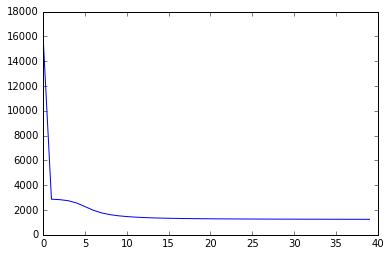

In [36]:
plt.plot(model_artm.score_tracker["PerplexityScore"].value)

Р’С‹РІРµРґРµРј С‚РѕРїС‹ СЃР»РѕРІ:

In [37]:
for topic_name in model_artm.topic_names:
    print topic_name + ': ',
    tokens = model_artm.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print

sbj0:  РїСЂР°РІРѕ Р±С‹С‚СЊ РєРѕС‚РѕСЂС‹Р№ С‡РµР»РѕРІРµРє СЂРµР±РµРЅРѕРє СЏР·С‹Рє РѕРЅРё С‚Р°РєР¶Рµ СЃРµРјСЊСЏ СЌС‚Рѕ СЏРІР»СЏС‚СЊСЃСЏ РєР°Рє РґР»СЏ СЃРІРѕР№ РјРѕС‡СЊ
sbj1:  С‡С‚Рѕ СЃРІРѕР№ РєРѕС‚РѕСЂС‹Р№ Р±С‹С‚СЊ СЌС‚Рѕ РіРµСЂРѕР№ РµРіРѕ СЌС‚РѕС‚ С‡РµР»РѕРІРµРє РѕРЅРё РѕРЅР° СЂРµР±РµРЅРѕРє РєР°Рє Р¶РёР·РЅСЊ С‚Р°РєРѕР№
sbj2:  РїСЂРµРґР»РѕР¶РµРЅРёРµ СЃР»РѕРІРѕ РєРѕС‚РѕСЂС‹Р№ С‡С‚Рѕ СЌС‚Рѕ РЅР°РїСЂРёРјРµСЂ Р±С‹С‚СЊ РєР°Рє СЃРёР»Р° РёР»Рё С‚Р°РєРѕР№ СЂРµС‡СЊ РѕРЅРё СЌС‚РѕС‚ РµСЃР»Рё
sbj3:  РєРѕС‚РѕСЂС‹Р№ С‡С‚Рѕ СЏРґСЂРѕ СЌРЅРµСЂРіРёСЏ СЌС‚Рѕ РІРѕРґР° СЌС‚РѕС‚ Р·РµРјР»СЏ Р±С‹С‚СЊ РјР°СЃСЃР° Р°С‚РѕРј РєР°Рє С‚РµРјРїРµСЂР°С‚СѓСЂР° С‚Р°РєРѕР№ РѕРєРµР°РЅ
sbj4:  РїСѓС€РєРёРЅ РїРѕСЌС‚ РєРѕС‚РѕСЂС‹Р№ С‡С‚Рѕ СЃС‚РёС…РѕС‚РІРѕСЂРµРЅРёРµ СЌС‚Рѕ Р±С‹С‚СЊ СЃРІРѕР№ СЌС‚РѕС‚ Р·РІСѓРє РіРѕРґ РІРµСЃСЊ РµРіРѕ Р»РёСЂРёРєР° С‚Р°РєРѕР№
sbj5:  x Р±С‹С‚СЊ a b С‡РёСЃР»Рѕ СЌС‚РѕС‚ РїСЂРё С„СѓРЅРєС†РёСЏ СѓСЂР°РІРЅРµРЅРёРµ С‡С‚Рѕ СЌС‚Рѕ РґР»СЏ РµСЃР»Рё С‚РѕРє РєРѕС‚РѕСЂС‹Р№
sbj6:  С‡РµР»РѕРІРµРє РєРѕС‚РѕСЂС‹Р№ СЃРІРѕ

Р”Р°РІР°Р№С‚Рµ РїРѕСЃРјРѕС‚СЂРёРј С‚Р°РєР¶Рµ РЅР° СЂР°Р·СЂРµР¶РµРЅРЅРѕСЃС‚СЊ РјР°С‚СЂРёС†:

In [38]:
print model_artm.score_tracker["SparsityPhiScore"].last_value
print model_artm.score_tracker["SparsityThetaScore"].last_value

0.75459345301
0.106092436975


Р’ С‚РµРјР°С… РјРЅРѕРіРѕ РѕР±С‰РµСѓРїРѕС‚СЂРµР±РёС‚РµР»СЊРЅС‹С… СЃР»РѕРІ (С‚Р°Рє РЅР°Р·С‹РІР°РµРјРѕР№, С„РѕРЅРѕРІРѕР№ Р»РµРєСЃРёРєРё). Р§С‚РѕР±С‹ СЌС‚РѕРіРѕ РёР·Р±РµР¶Р°С‚СЊ, Р±СѓРґРµРј РёСЃРїРѕР»СЊР·РѕРІР°С‚СЊ СЂР°Р·СЂРµР¶РёРІР°СЋС‰РёР№ СЂРµРіСѓР»СЏСЂРёР·Р°С‚РѕСЂ РґР»СЏ РјР°С‚СЂРёС†С‹ С„Рё. РћРЅ Р±СѓРґРµС‚ РїРѕРґР°РІР»СЏС‚СЊ СЃР»РѕРІР°, РєРѕС‚РѕСЂС‹Рµ РёРјРµСЋС‚ Р±РѕР»СЊС€СѓСЋ С‡Р°СЃС‚РѕС‚Сѓ РІРѕ РІСЃРµР№ РєРѕР»Р»РµРєС†РёРё.

In [39]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-100, dictionary=dictionary))
#РµСЃР»Рё РІС‹ С…РѕС‚РёС‚Рµ РїСЂРёРјРµРЅСЏС‚СЊ СЂРµРіСѓР»СЏСЂРёР·Р°С‚РѕСЂ С‚РѕР»СЊРєРѕ Рє РЅРµРєРѕС‚РѕСЂС‹Рј РјРѕРґР°Р»СЊРЅРѕСЃС‚СЏРј, СѓРєР°Р·С‹РІР°Р№С‚Рµ СЌС‚Рѕ РІ РїР°СЂР°РјРµС‚СЂРµ class_ids: class_ids=["text"]

In [40]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

In [41]:
for topic_name in model_artm.topic_names:
    print topic_name + ': ',
    tokens = model_artm.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print

sbj0:  РїСЂР°РІРѕ Р±С‹С‚СЊ РєРѕС‚РѕСЂС‹Р№ С‡РµР»РѕРІРµРє СЂРµР±РµРЅРѕРє СЏР·С‹Рє РѕРЅРё СЃРµРјСЊСЏ С‚Р°РєР¶Рµ СЌС‚Рѕ СЏРІР»СЏС‚СЊСЃСЏ РґР»СЏ СЃРІРѕР№ РІСЂРµРјСЏ СЂСѓСЃСЃРєРёР№
sbj1:  С‡С‚Рѕ СЃРІРѕР№ РєРѕС‚РѕСЂС‹Р№ Р±С‹С‚СЊ СЌС‚Рѕ РіРµСЂРѕР№ С‡РµР»РѕРІРµРє РµРіРѕ СЌС‚РѕС‚ РѕРЅР° Р¶РёР·РЅСЊ РѕРЅРё СЂРµР±РµРЅРѕРє РєР°Рє С‚Р°РєРѕР№
sbj2:  РїСЂРµРґР»РѕР¶РµРЅРёРµ СЃР»РѕРІРѕ РєРѕС‚РѕСЂС‹Р№ С‡С‚Рѕ СЌС‚Рѕ РЅР°РїСЂРёРјРµСЂ Р±С‹С‚СЊ РєР°Рє СЃРёР»Р° РёР»Рё С‚Р°РєРѕР№ СЂРµС‡СЊ РѕРЅРё СЌС‚РѕС‚ РµСЃР»Рё
sbj3:  РєРѕС‚РѕСЂС‹Р№ С‡С‚Рѕ СЏРґСЂРѕ СЌРЅРµСЂРіРёСЏ СЌС‚Рѕ РІРѕРґР° СЌС‚РѕС‚ Р·РµРјР»СЏ Р±С‹С‚СЊ РјР°СЃСЃР° Р°С‚РѕРј РєР°Рє С‚РµРјРїРµСЂР°С‚СѓСЂР° С‚Р°РєРѕР№ РѕРєРµР°РЅ
sbj4:  РїСѓС€РєРёРЅ РїРѕСЌС‚ РєРѕС‚РѕСЂС‹Р№ С‡С‚Рѕ СЃС‚РёС…РѕС‚РІРѕСЂРµРЅРёРµ Р±С‹С‚СЊ СЃРІРѕР№ СЌС‚Рѕ Р·РІСѓРє СЌС‚РѕС‚ РіРѕРґ РІРµСЃСЊ РµРіРѕ Р»РёСЂРёРєР° РїСЂРѕРёР·РІРµРґРµРЅРёРµ
sbj5:  x Р±С‹С‚СЊ a b С‡РёСЃР»Рѕ СЌС‚РѕС‚ РїСЂРё С„СѓРЅРєС†РёСЏ СѓСЂР°РІРЅРµРЅРёРµ С‡С‚Рѕ СЌС‚Рѕ РґР»СЏ РµСЃР»Рё С‚РѕРє РєРѕС‚РѕСЂС‹Р№
sbj6:  С‡РµР»РѕРІРµ

In [42]:
print model_artm.score_tracker["SparsityPhiScore"].last_value
print model_artm.score_tracker["SparsityThetaScore"].last_value

0.801751661594
0.285084033613


РџРѕРїСЂРѕР±СѓРµРј РјРµРЅСЏС‚СЊ РєРѕСЌС„С„РёС†РёРµРЅС‚ СЂРµРіСѓР»СЏСЂРёР·Р°С†РёРё:

In [43]:
model_artm.regularizers['SparsePhi'].tau = -5*1e4

In [44]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

In [45]:
for topic_name in model_artm.topic_names:
    print topic_name + ': ',
    tokens = model_artm.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print

sbj0:  РїСЂР°РІРѕ СЏР·С‹Рє СЃРІРѕР±РѕРґР° СЃРµРјСЊСЏ РіСЂР°Р¶РґР°РЅРёРЅ Р°РЅРіР»РёР№СЃРєРёР№ РїСЂР°РІРѕРІРѕР№ СЂРµР»РёРіРёРѕР·РЅС‹Р№ РіСЂР°Р¶РґР°РЅСЃРєРёР№ СЃСѓРґ РїРѕСЂСЏРґРѕРє РѕСЂРіР°РЅ С‡РµСЃС‚СЊ will is
sbj1:  СЂРµР±РµРЅРѕРє Р»РµСЂРјРѕРЅС‚РѕРІ РїРѕСЌРјР° СЃРєР°Р·РєР° РѕС‚РµС† РјРѕР»РѕРґРѕР№ С…РѕСЂРѕС€РёР№ СЃСЋР¶РµС‚ Р»СЋР±РёС‚СЊ РіРѕРіРѕР»СЊ РєРѕРјРµРґРёСЏ РЅРёС‡С‚Рѕ СЂРѕРјР°РЅС‚РёР·Рј Р¶РµРЅР° СЌРїРѕСЃ
sbj2:  СЃР»РѕРІРѕ РїСЂРµРґР»РѕР¶РµРЅРёРµ РЅР°РїСЂРёРјРµСЂ СЃР»СѓС‡Р°Р№ СЂР°Р±РѕС‚Р° РїСЂРѕСЃС‚РѕР№ РїСЂРµРґРјРµС‚ РєР°РєРѕР№ СЂРµС‡СЊ РіР»Р°РіРѕР» С„РёР·РёРєР° СЃРєРѕСЂРѕСЃС‚СЊ СЃРІРµС‚ РєС‚Рѕ СѓРіРѕР»
sbj3:  Р·РµРјР»СЏ СЌРЅРµСЂРіРёСЏ РІРѕРґР° СЏРґСЂРѕ РјР°СЃСЃР° РєРѕР»РёС‡РµСЃС‚РІРѕ РїСЂРёСЂРѕРґРЅС‹Р№ РѕРєРµР°РЅ Р°С‚РѕРј РґРІРёР¶РµРЅРёРµ С‚РµРјРїРµСЂР°С‚СѓСЂР° С‡Р°СЃС‚РёС†Р° Р·Р°СЂСЏРґ РјРѕСЂРµ СЂР°СЃРїРѕР»Р°РіР°С‚СЊ
sbj4:  РїСѓС€РєРёРЅ РїРѕСЌС‚ СЃС‚РёС…РѕС‚РІРѕСЂРµРЅРёРµ Р·РІСѓРє Р»РёСЂРёРєР° РїРёСЃР°С‚СЊ СЃС‚РёС… РїРѕСЌР·РёСЏ СЂСѓСЃСЊ Р±С‹Р»РёРЅР° РїРѕС‡С‚Рё Р»СЋР±РѕРІРЅС‹Р№ РєР

In [46]:
# РµС‰Рµ СЂР°Р· РїРѕСЃРјРѕС‚СЂРёРј РЅР° СЂР°Р·СЂРµР¶РµРЅРЅРѕСЃС‚СЊ
print model_artm.score_tracker["SparsityPhiScore"].last_value
print model_artm.score_tracker["SparsityThetaScore"].last_value

0.900080750357
0.331512605042


РћР±СЂР°С‚РёС‚Рµ РІРЅРёРјР°РЅРёРµ, С‡С‚Рѕ СЂР°Р·СЂРµР¶РёРІР°С‚СЊ РјРѕРґРµР»СЊ СЂРµРєРѕРјРµРЅРґСѓРµС‚СЃСЏ С‚РѕР»СЊРєРѕ РїРѕСЃР»Рµ С‚РѕРіРѕ, РєР°Рє РѕРЅР° СЃРѕС€Р»Р°СЃСЊ Р±РµР· СЂРµРіСѓР»СЏСЂРёР·Р°С†РёРё.

РЎРѕС…СЂР°РЅРµРЅРёРµ Рё Р·Р°РіСЂСѓР·РєР° РјРѕРґРµР»Рё:

In [ ]:
model_artm.save("my_model")

In [ ]:
model_artm.load("my_model")

РњРѕР¶РЅРѕ РїРѕРїСЂРѕСЃРёС‚СЊ РјР°С‚СЂРёС†С‹ РІ С‡РёСЃС‚РѕРј РІРёРґРµ:

In [47]:
phi = model_artm.get_phi()

In [48]:
phi

,sbj0,sbj1,sbj2,sbj3,sbj4,sbj5,sbj6,sbj7,sbj8,sbj9
РґРѕРјРѕС…РѕР·СЏР№РєР°,0.00000,0.000000,0.000123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
РёРЅСЃС‚РёС‚СѓС‚,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002557,0.000000,0.000000
РјР°С€РёРЅРєР°,0.00000,0.000000,0.000000,0.000000,0.000257,0.000000,0.000000,0.000000,0.000000,0.000000
РїСЂРѕС‡РёР№,0.00000,0.001465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
РЅР°РІСЏР·РЅСѓС‚СЊ,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000102,0.000000,0.000000,0.000000
С„РёР·РёРѕР»РѕРіРёСЏ,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000247,0.000000,0.000000
РёСЃС‚СЏР·Р°С‚СЊ,0.00024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
РІС‹Р±РѕСЂС‹,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000995
РєРЅРґСЂ,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000280,0.000000
С„РµРґРµСЂР°Р»РёР·Рј,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000093,0.000000


РњР°С‚СЂРёС†Р° РІРµСЂРѕСЏС‚РЅРѕСЃС‚РµР№ С‚РµРј РІ РґРѕРєСѓРјРµРЅС‚Р°С….

In [50]:
theta = model_artm.get_theta()
theta

,201,202,203,204,205,206,207,208,209,210,...,91,92,93,94,95,96,97,98,99,100
sbj0,0.000000,0.0,0.000000,0.025641,0.0,0.005495,1.282051e-02,0.007012,0.015306,0.016878,...,0.0,0.000000,0.000000,0.000000,0.004566,0.000000,0.000000,1.065346e-16,0.009944,0.020492
sbj1,0.004695,0.0,0.000000,0.005128,0.0,0.000000,2.326925e-09,0.071799,0.025636,0.025316,...,0.0,0.000000,0.000000,0.013393,0.305687,0.000000,0.309735,7.356615e-03,0.066667,0.479444
sbj2,0.061033,0.0,0.027053,0.035897,0.0,0.093407,4.273504e-02,0.041958,0.041297,0.017794,...,1.0,0.013451,0.341317,0.000000,0.000000,0.144444,0.017699,6.179777e-02,0.318133,0.049180
sbj3,0.652196,0.0,0.008969,0.020513,0.0,0.030890,2.564103e-02,0.017791,0.072254,0.000000,...,0.0,0.174107,0.000000,0.000000,0.000000,0.593818,0.000000,1.966293e-01,0.015045,0.000000
sbj4,0.000000,0.0,0.004484,0.000000,0.0,0.016905,9.110670e-03,0.020979,0.425943,0.000000,...,0.0,0.000000,0.000000,0.000000,0.013948,0.000000,0.022124,4.757892e-01,0.010018,0.000000
sbj5,0.282076,1.0,0.851805,0.046154,1.0,0.740760,7.264958e-02,0.061090,0.000000,0.039157,...,0.0,0.031250,0.658683,0.000000,0.000000,0.261737,0.017699,1.629214e-01,0.075431,0.000000
sbj6,0.000000,0.0,0.053812,0.148718,0.0,0.041114,2.173850e-01,0.160897,0.292013,0.063291,...,0.0,0.000000,0.000000,0.120536,0.602739,0.000000,0.314159,9.550567e-02,0.366667,0.286949
sbj7,0.000000,0.0,0.009034,0.497436,0.0,0.043956,8.974358e-02,0.499593,0.000000,0.042194,...,0.0,0.071429,0.000000,0.674107,0.073059,0.000000,0.106195,0.000000e+00,0.033333,0.073771
sbj8,0.000000,0.0,0.013453,0.148718,0.0,0.005495,2.905983e-01,0.000000,0.040816,0.315539,...,0.0,0.709763,0.000000,0.000000,0.000000,0.000000,0.048673,0.000000e+00,0.014286,0.000000
sbj9,0.000000,0.0,0.031390,0.071795,0.0,0.021978,2.393163e-01,0.118881,0.086735,0.479830,...,0.0,0.000000,0.000000,0.191964,0.000000,0.000000,0.163717,0.000000e+00,0.090476,0.090164


Р•СЃР»Рё Р±С‹ Сѓ РЅР°СЃ Р±С‹Р»Рё РЅРѕРІС‹Рµ Р±Р°С‚С‡Рё, РїРѕ РєРѕС‚РѕСЂС‹Рј РјС‹ РЅРµ СЃС‚СЂРѕРёРј РјРѕРґРµР»СЊ, Р° С…РѕС‚РёРј С‚РѕР»СЊРєРѕ РїРѕР»СѓС‡РёС‚СЊ РјР°С‚СЂРёС†Сѓ theta, РјРѕР¶РЅРѕ РїРѕР»СЊР·РѕРІР°С‚СЊСЃСЏ РјРµС‚РѕРґРѕРј transform.

In [28]:
theta_test = model_artm.transform(batch_vectorizer)